# Assignment - 16

## Convert Raw Images to 400x400

The following code was used to convert the images from various images collected from the internet to $400\times400$. 

```
import cv2
from os import listdir
from os.path import join

path, dpath = "raw", "img"
for f in listdir("raw"):
    ps, pd = join(path, f), join(dpath, f)
    img = cv2.imread(ps)
    img = cv2.resize(img, (400, 400))
    cv2.imwrite(pd, img)
```

In [3]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    import os
    os.chdir('/content')
    !git clone https://github.com/sambitdash/EVA-2-Group.git
    os.chdir('/content/EVA-2-Group/Session-16')
    !pwd

fatal: destination path 'EVA-2-Group' already exists and is not an empty directory.
/content/EVA-2-Group/Session-16


In [0]:
import json
import numpy as np

data=[]
with open("face_annots.json", "r") as read_file:
    data = json.load(read_file)
    
X = []

imgd = data['_via_img_metadata']#'img_001.jpg48539']['regions']

for _, imgval in imgd.items():
    for rgnd in imgval['regions']:
        shape = rgnd['shape_attributes']
        X.append([shape['width'], shape['height']])

X = np.reshape(X, (-1, 2))
X = X/400
lX = np.log(X)

## Scatter Plot Showing the Point Spread 
The plot is shown in linear and $log-log$ scale. The $log-log$ scale annuls the effect of scaling the images to $400\times400$.


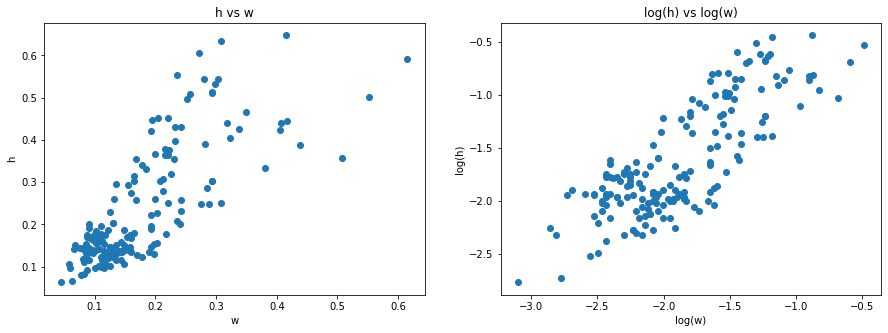

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(X[:, 0], X[:, 1], 'o')
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].plot(lX[:, 0], lX[:, 1], 'o')
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()

## Computation of K-Means Clustering

Clustering is carried out both in linear as well as $log-log$ scale just to differentiate the clustering and why $log-log$ scale will be superior. 

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(X)
lkmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(lX)

y_pred, ly_pred = kmeans.predict(X), lkmeans.predict(lX)


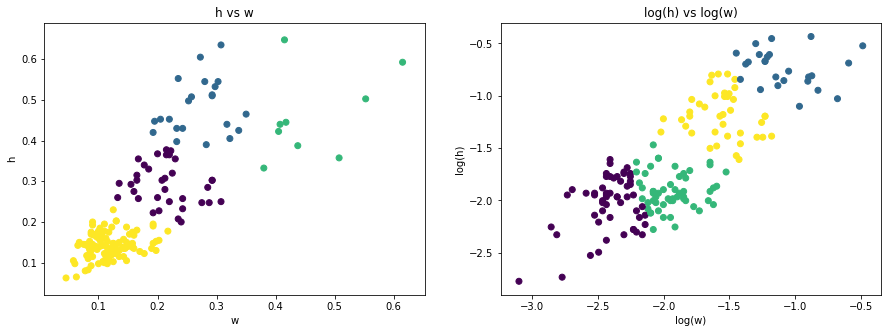

In [7]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].scatter(lX[:, 0], lX[:, 1], c=ly_pred)
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()

## Choosing the Best Boxes
The $log(w)$ vs $log(h)$ association is more equi-spaced and it may be ideal to take up the centroid of the k-means clusters be taken as the final bounding box. Moreover, the images are scaled from any arbitrary sizes to 400x400. The $log-log$ scale annuls the effect of the scaling. Since, the face height and width ratio is almost a fixed ratio the points are aligned around a diagonal. 

In [8]:
kmeans.cluster_centers_*400

array([[ 85.70588235, 116.82352941],
       [107.63636364, 192.68181818],
       [183.88888889, 183.44444444],
       [ 47.47272727,  57.11818182]])

In [9]:
bb = np.exp(lkmeans.cluster_centers_)*400
print(bb)

[[ 36.02889071  52.50903581]
 [135.82481164 191.1488564 ]
 [ 57.40340321  59.16256395]
 [ 83.94351297 122.36670261]]


## Visualization

Images are selected at random and the image has been superimposed with the computed bounding box. 

In [0]:
import cv2
from os import listdir
from os.path import join
import matplotlib.patches as patches

def plot_image(imgd, bb):
    idx = np.random.randint(0, 99)
    key = list(imgd.keys())[idx]
    imgval = imgd[key]
    ps = join("img", imgval["filename"])
    img = cv2.imread(ps)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.gcf()
    fig.set_size_inches(12, 12)
    plt.imshow(img)
    ax = fig.get_axes()[0]
    for rgnd in imgval['regions']:
        shape = rgnd['shape_attributes']
        x, y, w, h = shape['x'], shape['y'], shape['width'], shape['height']
        rect = patches.Rectangle((x, y), w, h, linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        cx, cy = (x + w/2), (y + h/2)
        nbb = len(bb)
        c = ['g', 'b', 'm', 'c']
        for i in range(nbb):
            w, h = bb[i, 0], bb[i, 1]
            x, y = cx - w/2, cy - h/2
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=c[i], facecolor='none')
            ax.add_patch(rect)
    plt.show()

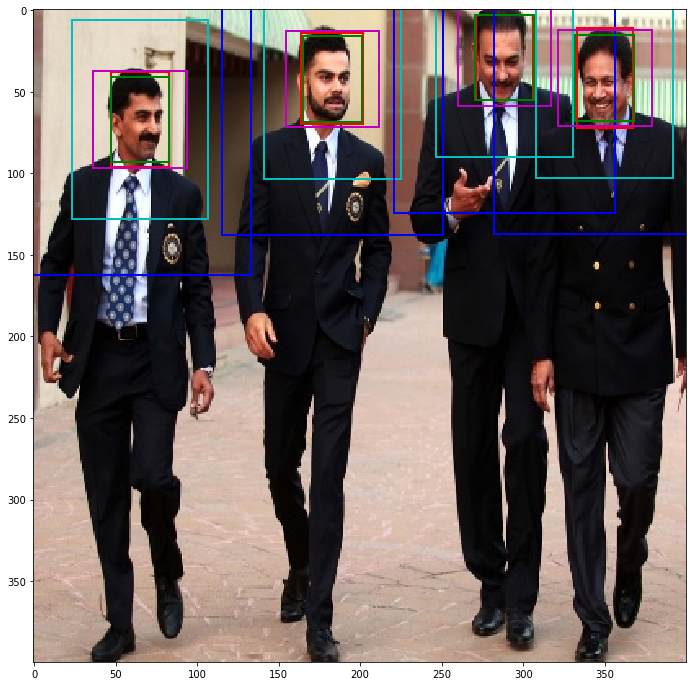

In [11]:
plot_image(imgd, bb)

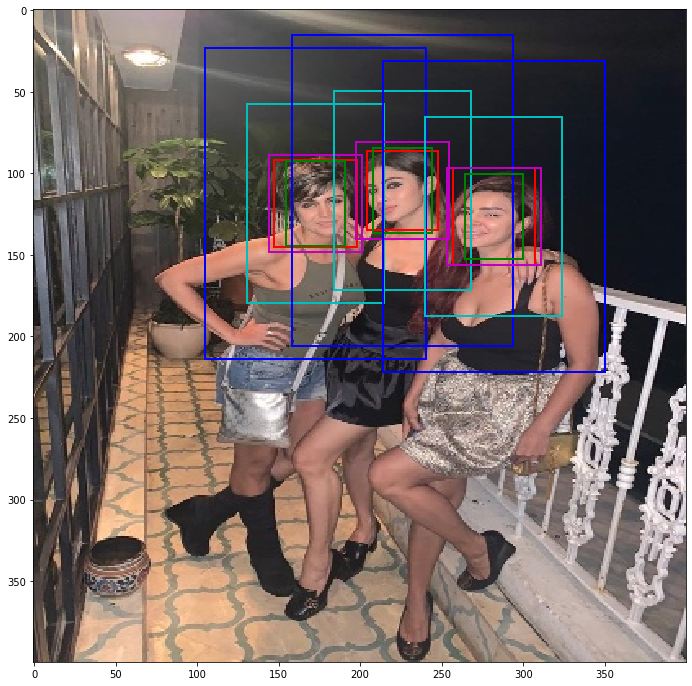

In [12]:
plot_image(imgd, bb)

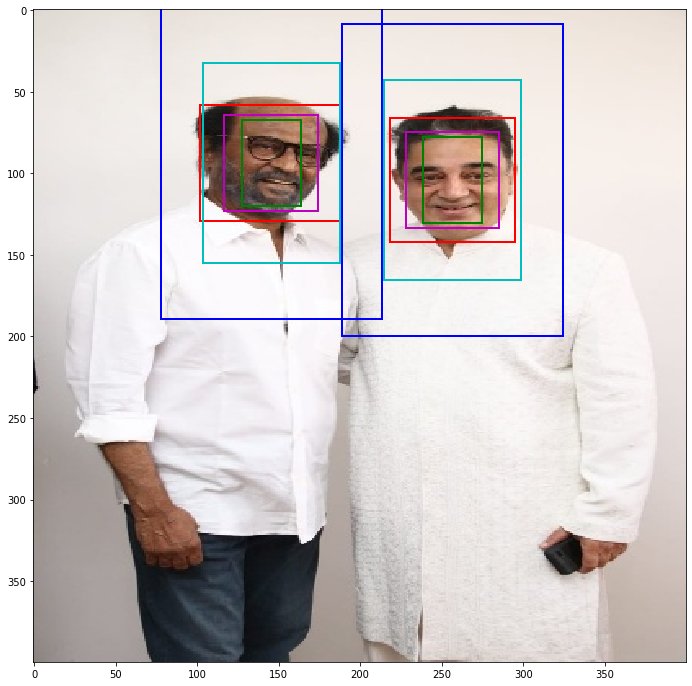

In [13]:
plot_image(imgd, bb)

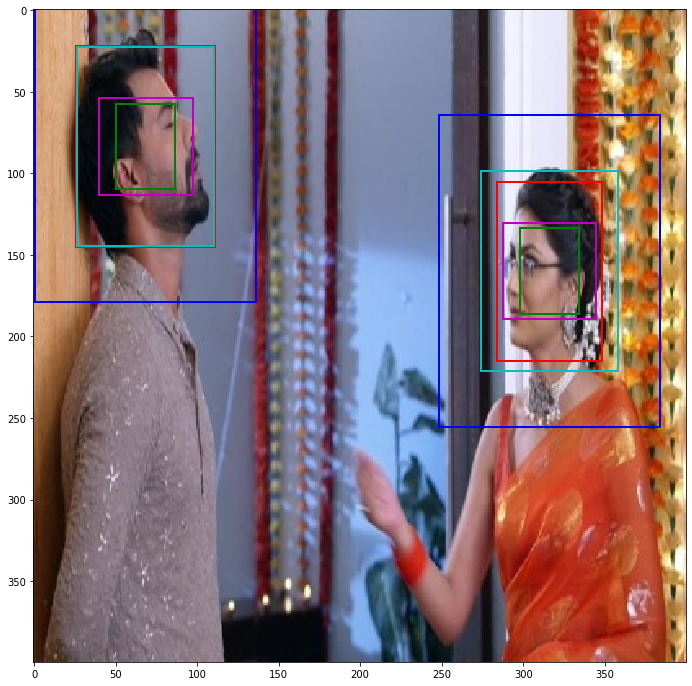

In [14]:
plot_image(imgd, bb)

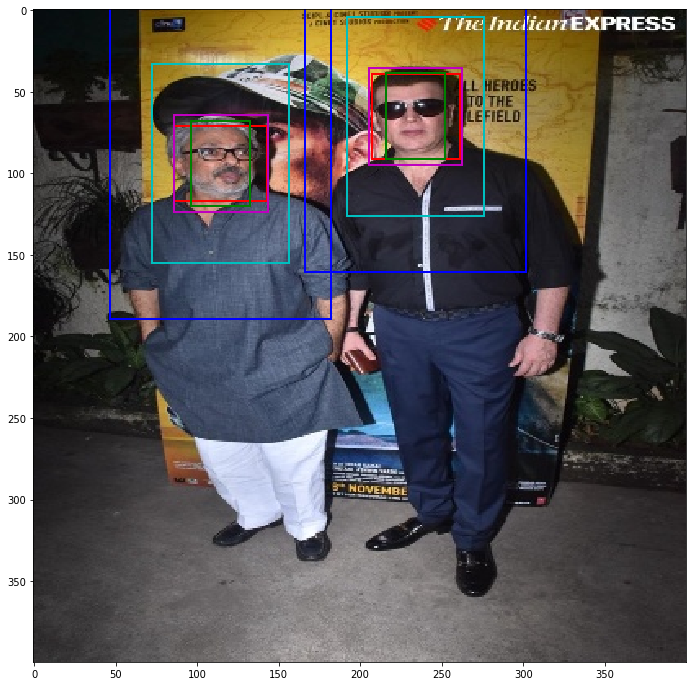

In [15]:
plot_image(imgd, bb)

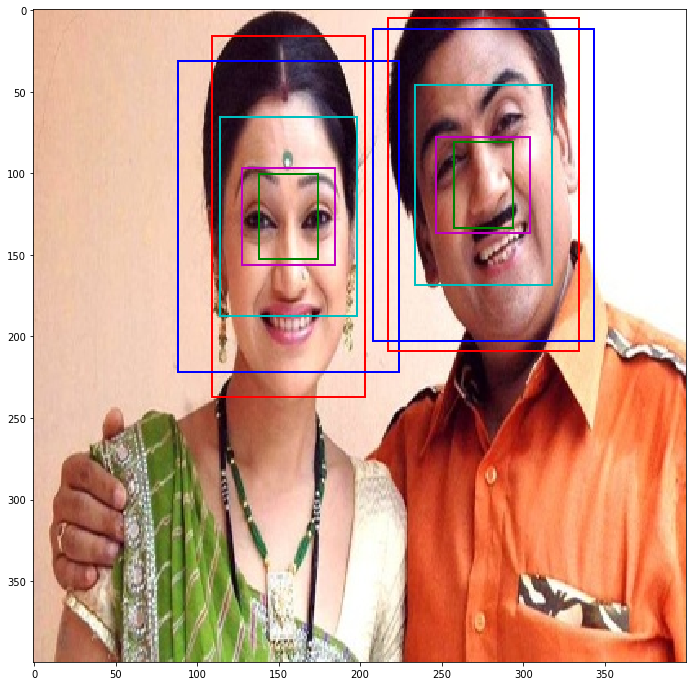

In [16]:
plot_image(imgd, bb)